# Set de ejercicios 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.- Distribución de puntos

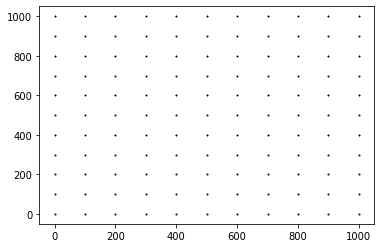

In [2]:

L=1000
d=100
x=[]
y=[]
for i in range (int(L/d+1)):
    for j in range(int(L/d+1)):
        x=np.append(x,[(i)*d])
        y=np.append(y,[(j)*d])

datos_malla=np.zeros(shape=(len(x),2), dtype=float)
datos_malla[:,0]=x
datos_malla[:,1]=y


plt.scatter(datos_malla[:,0],datos_malla[:,1], s=1, color='0')
plt.show()


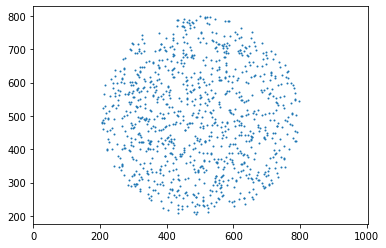

In [3]:
R=300
N=1000
phi = np.random.uniform(0,2*np.pi,N)
costheta =np.random.uniform(-1,1,N)
u = np.random.uniform(0,R**2,N)

theta = np.arccos( costheta )
r =  u**(1/2)

datos_disco=np.zeros(shape=(N,2), dtype=float)
datos_disco[:,0] = r * np.cos( phi) +500
datos_disco[:,1] = r * np.sin( phi) +500




plt.scatter(datos_disco[:,0],datos_disco[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()


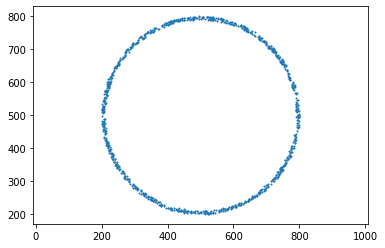

In [4]:

def Anillo(R0,Rf,N,L):
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2)

    datos_anillo=np.zeros(shape=(N,2), dtype=float)
    datos_anillo[:,0] = r * np.cos( phi)+L/2
    datos_anillo[:,1] = r * np.sin( phi)+L/2
    return datos_anillo
R0=290
Rf=300
N=1000
L=1000

datos_anillo=Anillo(R0,Rf,N,L)

plt.scatter(datos_anillo[:,0],datos_anillo[:,1], s=1)
plt.figsize=(40,40)
plt.axis('equal')
plt.show()



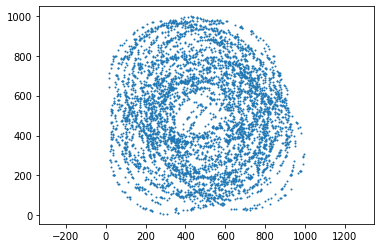

In [5]:
N=100 #numero puntos por anillo
NA=50 #numero de anillos
R0=290 #radio interior
Rf=300 #radio exterior

datos_anillos=np.zeros(shape=(N*NA,2), dtype=float)
x=[]
y=[]
for i in range(NA):
    x0=np.random.uniform(300,700)
    y0=np.random.uniform(300,700)
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2) 
    x=np.append(x,[r * np.cos( phi) +x0])
    y=np.append(y,[r * np.sin( phi) +y0])

     
plt.scatter(x,y, s=1)

datos_anillos[:,0]=x
datos_anillos[:,1]=y

plt.figsize=(40,40)
plt.axis('equal')
plt.show()

## 2.- Función de correlación para una distribución aleatoria

In [6]:
def DD(N,L,r,num_bins, Lmax):
    rango=Lmax/num_bins
    bins = [[i*rango +0.001, (i+1)*rango] for i in range(num_bins)]
    cuentas = [0 for i in bins]
    
    
    for i in range(N):
        for j in range(i+1,N):              
            dr = r[j]-r[i]
            Dr = np.sqrt(sum(dr*dr))    
            if Dr<Lmax:
                bin_number = int(Dr // rango)
                cuentas[bin_number] += 1        

    cuentas_norm=2*np.array(cuentas)/ (N*(N-1))
    return cuentas_norm

def DR(N,M,L,r,d,num_bins,Lmax):
    rango=Lmax/num_bins
    bins = [[i*rango +0.001, (i+1)*rango] for i in range(num_bins)]
    cuentas = [0 for i in bins]
 
    for i in range(N):
        for j in range(M):              
            dr = r[i]-d[j]
            Dr = np.sqrt(sum(dr*dr))
            if Dr<Lmax:
                bin_number = int(Dr // rango)
                cuentas[bin_number] += 1 

    cuentas_norm=np.array(cuentas)/ (N*M)
    return cuentas_norm

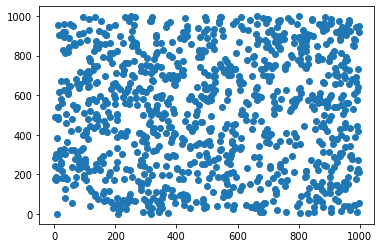

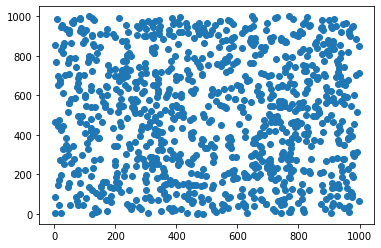

In [7]:

def Dat_random(N,L):
    datos_random= np.zeros(shape=(N,2), dtype=float)
    datos_random[:,0]=np.random.uniform(0.0,L ,N)
    datos_random[:,1] = np.random.uniform(0.0,L ,N)
    return datos_random
N=1000
L=1000

datos_random=Dat_random(N,L)
ax = plt.axes()
ax.scatter(datos_random[:,0], datos_random[:,1]);
plt.show()



datos_random2=Dat_random(N,L)
ax = plt.axes()
ax.scatter(datos_random2[:,0], datos_random2[:,1]);
plt.show()




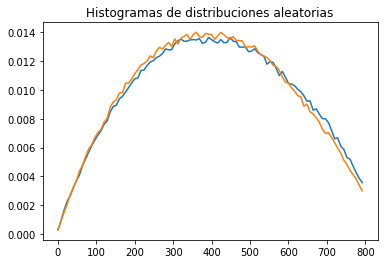

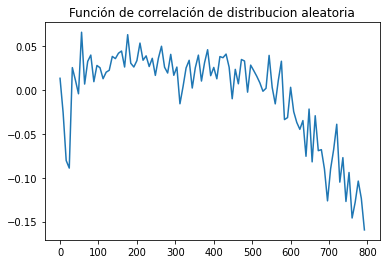

In [13]:
num_bins=100
Lmax=800
RR=DD(len(datos_random),L,datos_random,num_bins,1000)
RR2=DD(len(datos_random2),L,datos_random2,num_bins,1000)

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,RR)
plt.plot(langs,RR2)
plt.title('Histogramas de distribuciones aleatorias')
plt.show()

FC=np.divide(RR2,RR)-1

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC)
plt.title('Función de correlación de distribucion aleatoria')
plt.show()

## 3.- Función de correlación para diferentes distribuciones y su integración (5.-)

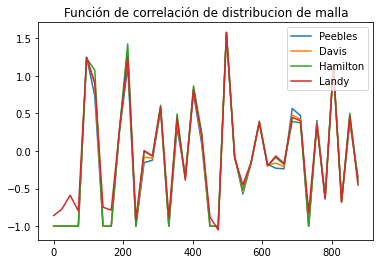

Resultado integral para Peebles-Hauser: -110.92299596478976
Resultado integral para Hamilton: -50.117139411347175
Resultado integral para Davis-Peebles: -35.099574965448966
Resultado integral para Landy-Szalay: -46.60091745706542


In [15]:
num_bins=38
Lmax=900
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
malla_DD=DD(len(datos_malla),1000,datos_malla,num_bins,Lmax)
malla_DR=DR(len(datos_malla),len(datos_malla),L,datos_random,datos_malla,num_bins,Lmax)
FC=np.divide(malla_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(malla_DD,RR),np.multiply(malla_DR,malla_DR))-1
FC_Davis=np.divide(malla_DD,malla_DR)-1
FC_Landy=np.divide(malla_DD,RR)-2*np.divide(malla_DR,RR)+1


langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación de distribucion de malla')
plt.show()

#integrales
print('Resultado integral para Peebles-Hauser: '+str(sum(FC*(Lmax/num_bins))))
print('Resultado integral para Hamilton: '+str(sum(FC_Davis[2:]*(Lmax/num_bins))))
print('Resultado integral para Davis-Peebles: '+str(sum(FC_Hamilton[2:]*(Lmax/num_bins))))
print('Resultado integral para Landy-Szalay: '+str(sum(FC_Landy*(Lmax/num_bins))))

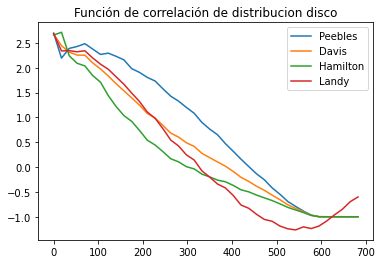

Resultado integral para Peebles-Hauser: 527.8154067430232
Resultado integral para Hamilton: 212.80180322002917
Resultado integral para Davis-Peebles: 42.664733654541266
Resultado integral para Landy-Szalay: 192.2403394084437


In [16]:
L=1000
Lmax=700
num_bins=40
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
disco_DD=DD(len(datos_disco),L,datos_disco,num_bins,Lmax)
disco_DR=DR(len(datos_random),len(datos_disco),L,datos_random,datos_disco,num_bins,Lmax)

FC=np.divide(disco_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(disco_DD,RR),np.multiply(disco_DR,disco_DR))-1
FC_Davis=np.divide(disco_DD,disco_DR)-1
FC_Landy=np.divide(disco_DD,RR)-2*np.divide(disco_DR,RR)+1

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación de distribucion disco')
plt.show()

#integrales
print('Resultado integral para Peebles-Hauser: '+str(sum(FC*(Lmax/num_bins))))
print('Resultado integral para Hamilton: '+str(sum(FC_Davis[2:]*(Lmax/num_bins))))
print('Resultado integral para Davis-Peebles: '+str(sum(FC_Hamilton[2:]*(Lmax/num_bins))))
print('Resultado integral para Landy-Szalay: '+str(sum(FC_Landy*(Lmax/num_bins))))





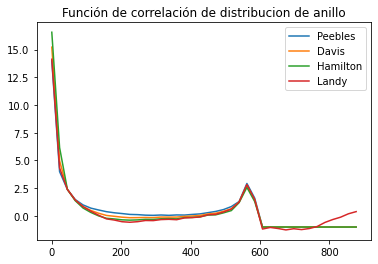

Resultado integral para Peebles-Hauser: 470.6710997113853
Resultado integral para Hamilton: -37.469521123530285
Resultado integral para Davis-Peebles: -123.65996502888416
Resultado integral para Landy-Szalay: 369.03611400389553


In [17]:
L=1000
Lmax=900
num_bins=40
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
anillo_DD=DD(len(datos_anillo),L,datos_anillo,num_bins,Lmax)
anillo_DR=DR(len(datos_random),len(datos_anillo),L,datos_random,datos_anillo,num_bins,Lmax)

FC=np.divide(anillo_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(anillo_DD,RR),np.multiply(anillo_DR,anillo_DR))-1
FC_Davis=np.divide(anillo_DD,anillo_DR)-1
FC_Landy=np.divide(anillo_DD,RR)-2*np.divide(anillo_DR,RR)+1

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación de distribucion de anillo')
plt.show()

#integrales
print('Resultado integral para Peebles-Hauser: '+str(sum(FC*(Lmax/num_bins))))
print('Resultado integral para Hamilton: '+str(sum(FC_Davis[2:]*(Lmax/num_bins))))
print('Resultado integral para Davis-Peebles: '+str(sum(FC_Hamilton[2:]*(Lmax/num_bins))))
print('Resultado integral para Landy-Szalay: '+str(sum(FC_Landy*(Lmax/num_bins))))

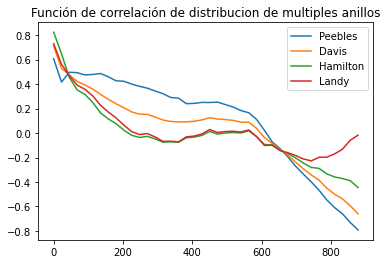

Resultado integral para Peebles-Hauser: 92.3449318141855
Resultado integral para Hamilton: 2.6020895397454584
Resultado integral para Davis-Peebles: -47.37629779293173
Resultado integral para Landy-Szalay: 28.1087710039138


In [18]:
L=1000
num_bins=40
Lmax=900
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
anillos_DD=DD(len(datos_anillos),L,datos_anillos,num_bins,Lmax)
anillos_DR=DR(len(datos_random),len(datos_anillos),L,datos_random,datos_anillos,num_bins,Lmax)

FC=np.divide(anillos_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(anillos_DD,RR),np.multiply(anillos_DR,anillos_DR))-1
FC_Davis=np.divide(anillos_DD,anillos_DR)-1
FC_Landy=np.divide(anillos_DD,RR)-2*np.divide(anillos_DR,RR)+1

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación de distribucion de multiples anillos')
plt.show()

#integrales
print('Resultado integral para Peebles-Hauser: '+str(sum(FC*(Lmax/num_bins))))
print('Resultado integral para Hamilton: '+str(sum(FC_Davis[2:]*(Lmax/num_bins))))
print('Resultado integral para Davis-Peebles: '+str(sum(FC_Hamilton[2:]*(Lmax/num_bins))))
print('Resultado integral para Landy-Szalay: '+str(sum(FC_Landy*(Lmax/num_bins))))


## 4.- Función de correlación promediando histogramas, funciones de correlación y usando diferentes archivos de distribuciones aleatorias


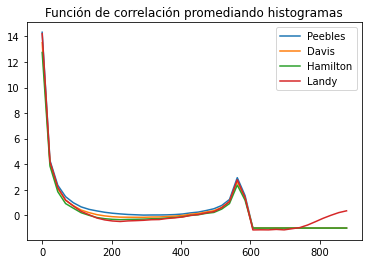

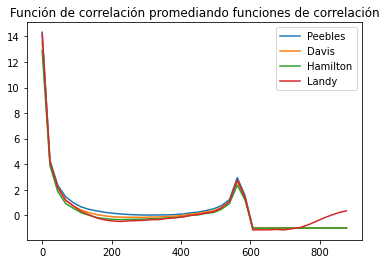

In [19]:
N=1000
L=1000
R0=290
Rf=300

datos_anillo=Anillo(R0,Rf,N,L)
datos_random1=Dat_random(N,L)
datos_random2=Dat_random(2*N,L)
datos_random3=Dat_random(5*N,L)

L=1000
Lmax=900
num_bins=40
anillo_DD=DD(len(datos_anillo),L,datos_anillo,num_bins,Lmax)


RR1=DD(len(datos_random1),L,datos_random1,num_bins,Lmax)
RR2=DD(len(datos_random2),L,datos_random2,num_bins,Lmax)
RR3=DD(len(datos_random3),L,datos_random3,num_bins,Lmax)



anillo_DR1=DR(len(datos_random1),len(datos_anillo),L,datos_random1,datos_anillo,num_bins,Lmax)
anillo_DR2=DR(len(datos_random2),len(datos_anillo),L,datos_random2,datos_anillo,num_bins,Lmax)
anillo_DR3=DR(len(datos_random3),len(datos_anillo),L,datos_random3,datos_anillo,num_bins,Lmax)

RR_promedio=(RR1+RR2+RR3)/3
anillo_DR_promedio=(anillo_DR1+anillo_DR2+anillo_DR3)/3

FC_a=np.divide(anillo_DD,RR_promedio)-1
FC_Hamilton_a=np.divide(np.multiply(anillo_DD,RR_promedio),np.multiply(anillo_DR_promedio,anillo_DR_promedio))-1
FC_Davis_a=np.divide(anillo_DD,anillo_DR_promedio)-1
FC_Landy_a=np.divide(anillo_DD,RR_promedio)-2*np.divide(anillo_DR_promedio,RR_promedio)+1

FC1=np.divide(anillo_DD,RR1)-1
FC_Hamilton1=np.divide(np.multiply(anillo_DD,RR1),np.multiply(anillo_DR1,anillo_DR1))-1
FC_Davis1=np.divide(anillo_DD,anillo_DR1)-1
FC_Landy1=np.divide(anillo_DD,RR1)-2*np.divide(anillo_DR1,RR1)+1

FC2=np.divide(anillo_DD,RR2)-1
FC_Hamilton2=np.divide(np.multiply(anillo_DD,RR2),np.multiply(anillo_DR2,anillo_DR2))-1
FC_Davis2=np.divide(anillo_DD,anillo_DR2)-1
FC_Landy2=np.divide(anillo_DD,RR2)-2*np.divide(anillo_DR2,RR2)+1

FC3=np.divide(anillo_DD,RR3)-1
FC_Hamilton3=np.divide(np.multiply(anillo_DD,RR3),np.multiply(anillo_DR3,anillo_DR3))-1
FC_Davis3=np.divide(anillo_DD,anillo_DR3)-1
FC_Landy3=np.divide(anillo_DD,RR3)-2*np.divide(anillo_DR3,RR3)+1

FC_promedio=(FC1+FC2+FC3)/3
FC_Hamilton_promedio=(FC_Hamilton1+FC_Hamilton2+FC_Hamilton3)/3
FC_Davis_promedio=(FC_Davis1+FC_Davis2+FC_Davis3)/3
FC_Landy_promedio=(FC_Landy1+FC_Landy2+FC_Landy3)/3


langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC_a, label='Peebles')
plt.plot(langs,FC_Davis_a,label='Davis')
plt.plot(langs,FC_Hamilton_a,label='Hamilton')
plt.plot(langs,FC_Landy_a,label='Landy')
plt.legend()
plt.title('Función de correlación promediando histogramas')
plt.show()

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC_promedio, label='Peebles')
plt.plot(langs,FC_Davis_promedio,label='Davis')
plt.plot(langs,FC_Hamilton_promedio,label='Hamilton')
plt.plot(langs,FC_Landy_promedio,label='Landy')
plt.legend()
plt.title('Función de correlación promediando funciones de correlación')
plt.show()



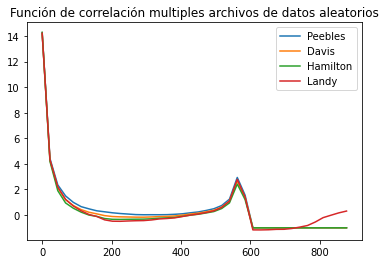

In [20]:
archivos=5
L=1000
Lmax=900
num_bins=40
anillo_DD=DD(len(datos_anillo),L,datos_anillo,num_bins,Lmax)

FC= np.zeros(num_bins, dtype=float)
FC_Hamilton= np.zeros(num_bins, dtype=float)
FC_Davis= np.zeros(num_bins, dtype=float)
FC_Landy= np.zeros(num_bins, dtype=float)



for i in range(archivos):
    datos_random=Dat_random(N,L)
    anillo_DR=DR(len(datos_random),len(datos_anillo),L,datos_random,datos_anillo,num_bins,Lmax)
    RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
    FC+=np.divide(anillo_DD,RR)-1
    FC_Hamilton+=np.divide(np.multiply(anillo_DD,RR),np.multiply(anillo_DR,anillo_DR))-1
    FC_Davis+=np.divide(anillo_DD,anillo_DR)-1
    FC_Landy+=np.divide(anillo_DD,RR)-2*np.divide(anillo_DR,RR)+1
    
FC=FC/archivos
FC_Hamilton=FC_Hamilton/archivos
FC_Davis=FC_Davis/archivos
FC_Landy=FC_Landy/archivos


langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación multiples archivos de datos aleatorios')
plt.show()

Al aumentar el número de puntos el tiempo que tarda en correr el programa hizo que sólo lo aumentara en 2 y 5 veces el número de puntos. El tiempo que tarda en correr con 5 archivos diferentes de valores aleatorios es menor y no hay una diferencia aparente en las gráficas resultantes de los dos métodos.

## 6.- Funciones de correlación para L=2000, L=3000 con misma cantidad de puntos

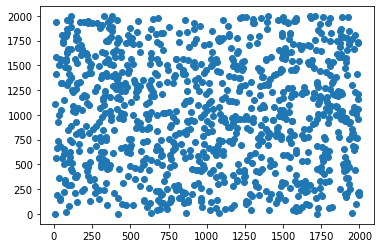

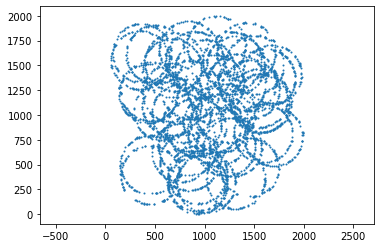

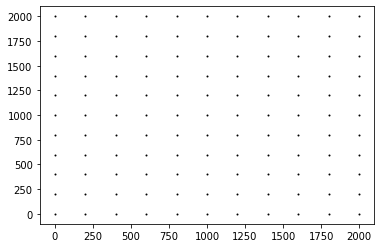

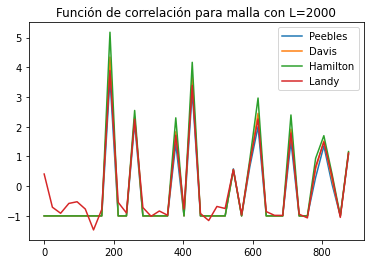

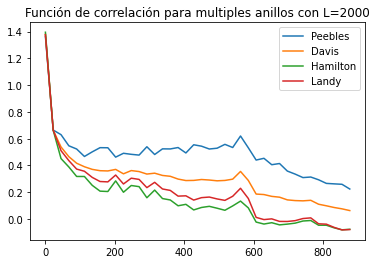

In [21]:
N=1000
L=2000

datos_random=Dat_random(N,L)
ax = plt.axes()
ax.scatter(datos_random[:,0], datos_random[:,1]);
plt.show()



N=100 #numero puntos por anillo
NA=50 #numero de anillos
R0=290 #radio interior
Rf=300 #radio exterior

datos_anillos=np.zeros(shape=(N*NA,2), dtype=float)
x=[]
y=[]
for i in range(NA):
    x0=np.random.uniform(300,1700)
    y0=np.random.uniform(300,1700)
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2) 
    x=np.append(x,[r * np.cos( phi) +x0])
    y=np.append(y,[r * np.sin( phi) +y0])

     
plt.scatter(x,y, s=1)

datos_anillos[:,0]=x
datos_anillos[:,1]=y

plt.figsize=(40,40)
plt.axis('equal')
plt.show()


L=2000
d=200
x=[]
y=[]
for i in range (int(L/d+1)):
    for j in range(int(L/d+1)):
        x=np.append(x,[(i)*d])
        y=np.append(y,[(j)*d])

datos_malla=np.zeros(shape=(len(x),2), dtype=float)
datos_malla[:,0]=x
datos_malla[:,1]=y


plt.scatter(datos_malla[:,0],datos_malla[:,1], s=1, color='0')
plt.show()

num_bins=38
Lmax=900
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
malla_DD=DD(len(datos_malla),1000,datos_malla,num_bins,Lmax)
malla_DR=DR(len(datos_malla),len(datos_malla),L,datos_random,datos_malla,num_bins,Lmax)
FC=np.divide(malla_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(malla_DD,RR),np.multiply(malla_DR,malla_DR))-1
FC_Davis=np.divide(malla_DD,malla_DR)-1
FC_Landy=np.divide(malla_DD,RR)-2*np.divide(malla_DR,RR)+1


langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación para malla con L=2000')
plt.show()

num_bins=40
Lmax=900
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
anillos_DD=DD(len(datos_anillos),L,datos_anillos,num_bins,Lmax)
anillos_DR=DR(len(datos_random),len(datos_anillos),L,datos_random,datos_anillos,num_bins,Lmax)

FC=np.divide(anillos_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(anillos_DD,RR),np.multiply(anillos_DR,anillos_DR))-1
FC_Davis=np.divide(anillos_DD,anillos_DR)-1
FC_Landy=np.divide(anillos_DD,RR)-2*np.divide(anillos_DR,RR)+1

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación para multiples anillos con L=2000')
plt.show()

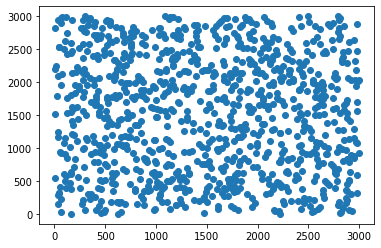

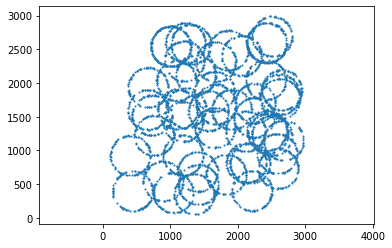

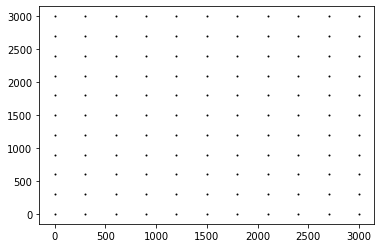

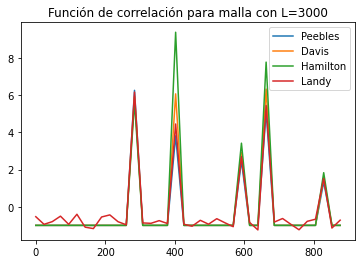

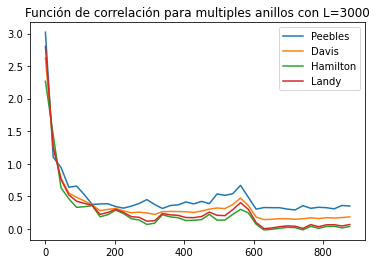

In [22]:
N=1000
L=3000

datos_random=Dat_random(N,L)
ax = plt.axes()
ax.scatter(datos_random[:,0], datos_random[:,1]);
plt.show()

N=100 #numero puntos por anillo
NA=50 #numero de anillos
R0=290 #radio interior
Rf=300 #radio exterior

datos_anillos=np.zeros(shape=(N*NA,2), dtype=float)
x=[]
y=[]
for i in range(NA):
    x0=np.random.uniform(300,2700)
    y0=np.random.uniform(300,2700)
    phi = np.random.uniform(0,2*np.pi,N)
    costheta =np.random.uniform(-1,1,N)
    u = np.random.uniform(R0**2,Rf**2,N)

    theta = np.arccos( costheta )
    r =  u**(1/2) 
    x=np.append(x,[r * np.cos( phi) +x0])
    y=np.append(y,[r * np.sin( phi) +y0])

     
plt.scatter(x,y, s=1)

datos_anillos[:,0]=x
datos_anillos[:,1]=y

plt.figsize=(40,40)
plt.axis('equal')
plt.show()


L=3000
d=300
x=[]
y=[]
for i in range (int(L/d+1)):
    for j in range(int(L/d+1)):
        x=np.append(x,[(i)*d])
        y=np.append(y,[(j)*d])

datos_malla=np.zeros(shape=(len(x),2), dtype=float)
datos_malla[:,0]=x
datos_malla[:,1]=y


plt.scatter(datos_malla[:,0],datos_malla[:,1], s=1, color='0')
plt.show()


num_bins=38
Lmax=900
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
malla_DD=DD(len(datos_malla),1000,datos_malla,num_bins,Lmax)
malla_DR=DR(len(datos_malla),len(datos_malla),L,datos_random,datos_malla,num_bins,Lmax)
FC=np.divide(malla_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(malla_DD,RR),np.multiply(malla_DR,malla_DR))-1
FC_Davis=np.divide(malla_DD,malla_DR)-1
FC_Landy=np.divide(malla_DD,RR)-2*np.divide(malla_DR,RR)+1


langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación para malla con L=3000')
plt.show()

num_bins=40
Lmax=900
RR=DD(len(datos_random),L,datos_random,num_bins,Lmax)
anillos_DD=DD(len(datos_anillos),L,datos_anillos,num_bins,Lmax)
anillos_DR=DR(len(datos_random),len(datos_anillos),L,datos_random,datos_anillos,num_bins,Lmax)

FC=np.divide(anillos_DD,RR)-1
FC_Hamilton=np.divide(np.multiply(anillos_DD,RR),np.multiply(anillos_DR,anillos_DR))-1
FC_Davis=np.divide(anillos_DD,anillos_DR)-1
FC_Landy=np.divide(anillos_DD,RR)-2*np.divide(anillos_DR,RR)+1

langs = np.arange(0,Lmax,Lmax/num_bins)
plt.plot(langs,FC, label='Peebles')
plt.plot(langs,FC_Davis,label='Davis')
plt.plot(langs,FC_Hamilton,label='Hamilton')
plt.plot(langs,FC_Landy,label='Landy')
plt.legend()
plt.title('Función de correlación para multiples anillos con L=3000')
plt.show()



El aumentar el tamaño de la caja a 2000 y 300, pero no aumentar el número de puntos, hizo que las funciones de correlación fueran más similares entre ellas comparandolas con los resultados de la caja de lado 1000.